***Chennai House Price Prediction***

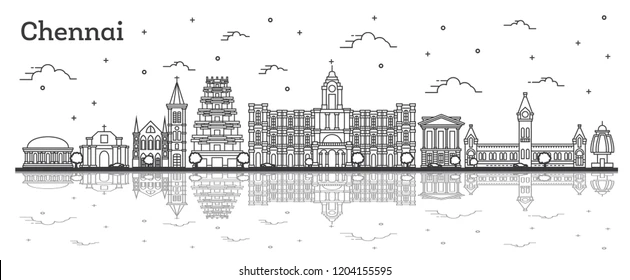

**Problem Statement.**

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

###Import Required Packages

In [1]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,roc_auc_score,plot_roc_curve
from datetime import datetime as dt
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xg
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

###Getting Data

In [2]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Project_1')
os.listdir()
data =pd.read_csv('train-chennai-sale.csv')
data.head()

Mounted at /content/drive


,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [4]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [5]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


###Cleaning

In [6]:
#filling the null values
data['N_BEDROOM']=data['N_BEDROOM'].fillna(data['N_BEDROOM'].mode()[0])
data['N_BATHROOM']=data['N_BATHROOM'].fillna(data['N_BATHROOM'].mode()[0])
data['QS_OVERALL']=data['QS_OVERALL'].fillna(data['QS_OVERALL'].mean())

data.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [7]:
#delete unwanted column.
data.drop('PRT_ID',axis='columns', inplace=True)
data.drop('REG_FEE',axis='columns', inplace=True)
data.drop('COMMIS',axis='columns', inplace=True)

In [8]:
#some column contains too many spelling mistakes.
# data.AREA.unique()
data["AREA"].replace({"Karapakam": "Karapakkam", "Chormpet": "Chrompet","Chrompt": "Chrompet",
                     "TNagar": "T.Nagar","T Nagar":"T.Nagar","Velchery":"Velachery","Ann Nagar":"Anna Nagar","Ana Nagar":'Anna Nagar',
                     "Chrmpet":"Chrompet","KKNagar":"KK Nagar","Adyr":"Adyar"}, inplace=True)

# data.STREET.unique()
data["STREET"].replace({"Pavd":"Paved","NoAccess":"No Access"},inplace=True)

# data.SALE_COND.unique()
data["SALE_COND"].replace({"AbNormal":"Ab Normal","Partiall":"Partial","PartiaLl":"Partial","AdjLand":"Adj Land"},inplace=True)

# data.UTILITY_AVAIL.unique()
data["UTILITY_AVAIL"].replace({"AllPub":"All Pub"},inplace = True)

# data.PARK_FACIL.unique()
data["PARK_FACIL"].replace({"Noo":"No"},inplace=True)

# data.BUILDTYPE.unique()
data["BUILDTYPE"].replace({"Comercial":"Commercial","Other":"Others"},inplace=True)


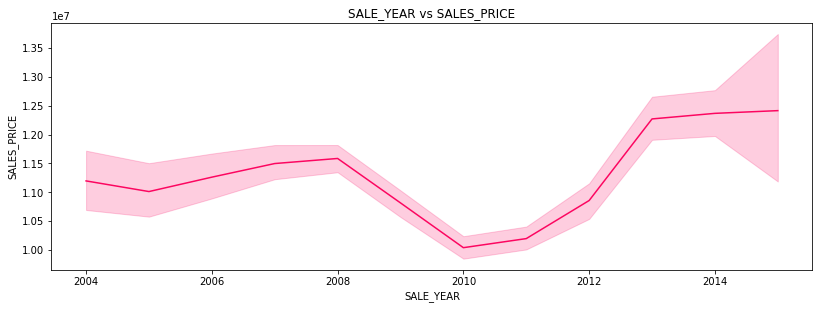

In [9]:
#calculate the age of the building
data['DATE_SALE']=pd.to_datetime(data['DATE_SALE'])
data['DATE_BUILD']=pd.to_datetime(data["DATE_BUILD"])
pd.DataFrame(data.dtypes.value_counts())

data['BUILD_YEAR'] = data['DATE_BUILD'].dt.year
data['SALE_YEAR'] = data['DATE_SALE'].dt.year

data['AGE_OF_BUILDING'] = data['SALE_YEAR']-data['BUILD_YEAR']


plt.figure(figsize=(30,10))
plt.subplot(221)
sns.lineplot(x = "SALE_YEAR", y = data["SALES_PRICE"], data = data,color='#FC0660')
plt.title('SALE_YEAR vs SALES_PRICE')


data.drop('DATE_BUILD',axis='columns', inplace=True)
data.drop('DATE_SALE',axis='columns', inplace=True)




*   There is a sudden decrease on year 2008-2010.Because of the global financial crisis.
*   There also small decrease in house price around 2005.

*   SOURCE =https://www.rba.gov.au/education/resources/explainers/the-global-financial-crisis.html







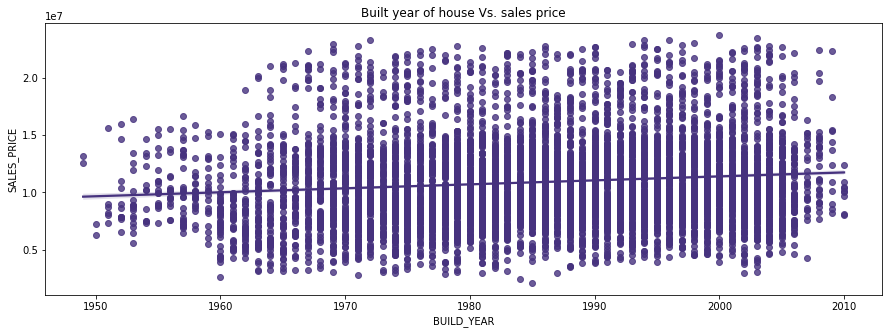

In [10]:
plt.figure(figsize=(15,5))
sns.set_palette('viridis')
ax = sns.regplot(data=data, x='BUILD_YEAR', y='SALES_PRICE')
plt.title("Built year of house Vs. sales price")
plt.show()



*   This data set contain data between 1950 to 2010
*   There is a linear trend on the plot.



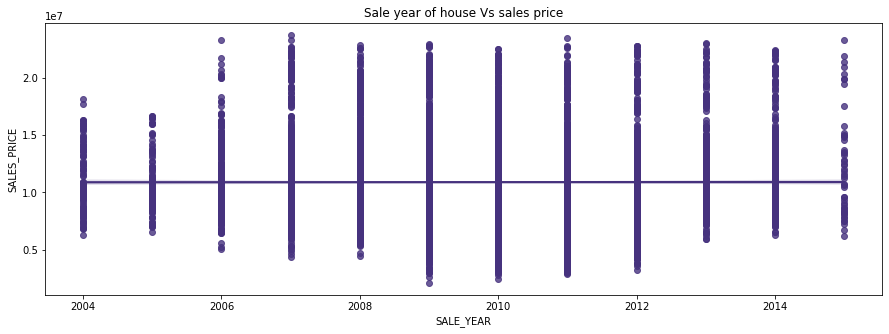

In [11]:
plt.figure(figsize=(15,5))
sns.regplot(data=data, x='SALE_YEAR', y='SALES_PRICE')
plt.title("Sale year of house Vs sales price")
plt.show()



*   The houses were sold between 2004 to 2014.
*   There is a linear trend on the plot.



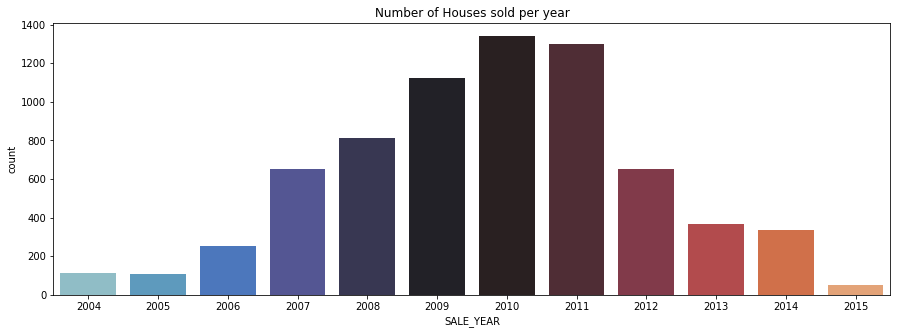

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(data=data, x='SALE_YEAR', palette='icefire')
plt.title("Number of Houses sold per year")
plt.show()



*   In 2010, highest number of houses were sold followed by 2011 and 2009.


*   Least number of houses are sold in 2004, 2005, and 2015.



###EDA

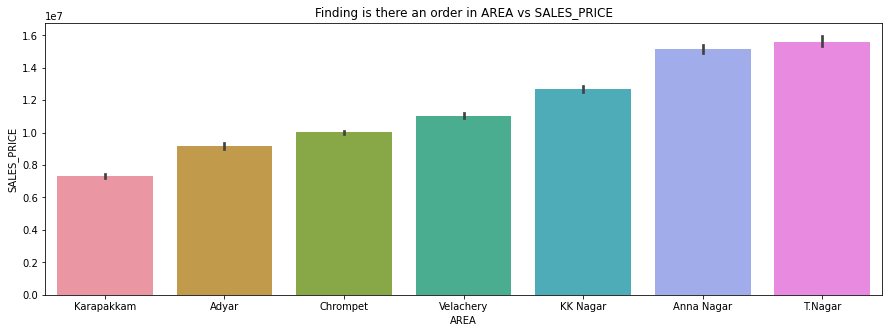

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x='AREA',y='SALES_PRICE',data=data,order=data.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.title('Finding is there an order in AREA vs SALES_PRICE')
plt.show()

This plot shows that there is a linear relation between target and feature.so we can use lable encoding using map functio for that feature.
The AREA T.Nagar contains higher SALES_PRICE range.

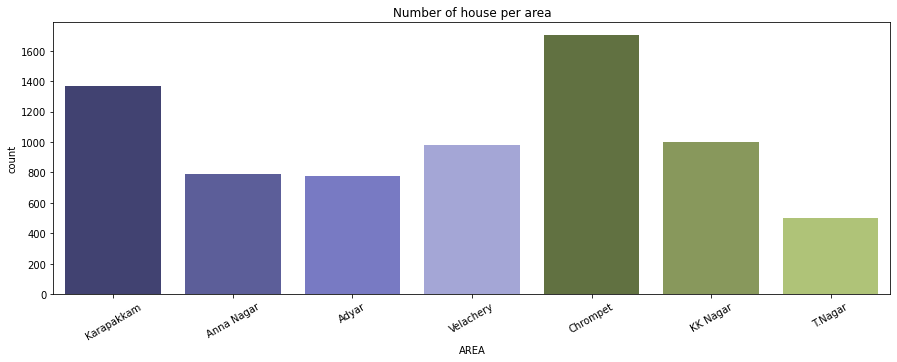

In [14]:
plt.figure(figsize=(15,5))
sns.countplot(x='AREA', data=data, palette='tab20b')
plt.title("Number of house per area")
plt.xticks(rotation=30)
plt.show()



*   Most houses were sold in Chrompet followed by Karapakkam, KK Nagar, and Velachery.
*   T.Nagar has least number of houses sold.



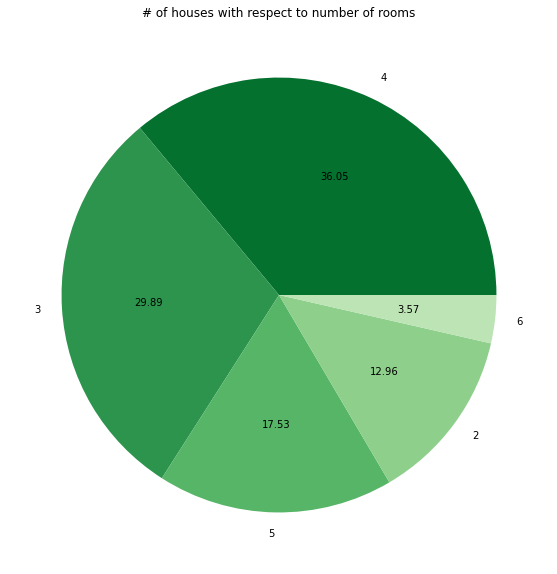

In [15]:
plt.figure(figsize=(15,10))
sns.set_palette('Greens_r')
data.N_ROOM.value_counts().plot(kind='pie', autopct="%.2f")
plt.title("# of houses with respect to number of rooms")
plt.ylabel('')
plt.show()



*   The above pie plot evident that people are interested in house with 4 number of rooms followed by 3 rooms.


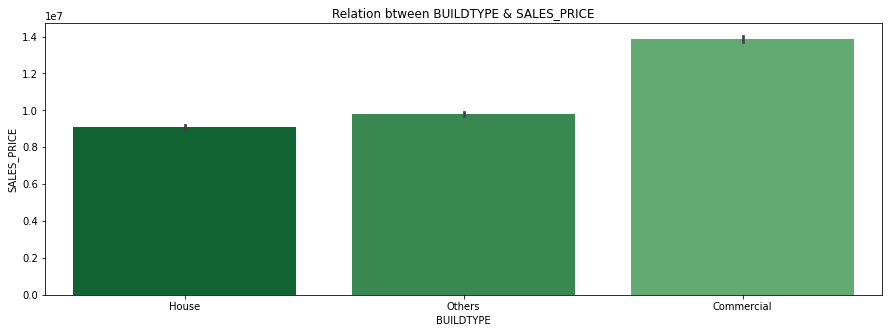

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=data,order=data.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.title("Relation btween BUILDTYPE & SALES_PRICE")
plt.show()



*   Here there is no linear relation between the values so we can go with Label Encode.
*   Commertial type houses has much sales price.



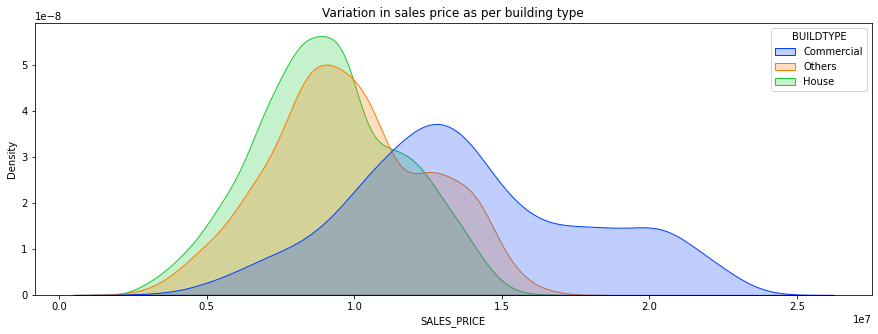

In [17]:
sns.set_palette('bright')
plt.figure(figsize=(15,5))
sns.kdeplot(data=data, x='SALES_PRICE', hue='BUILDTYPE', shade=True)
plt.title("Variation in sales price as per building type")
plt.show()



*   Commercial build type houses are of high price.
*   Too much houses are sold from other types and residential houses than commercial built types.



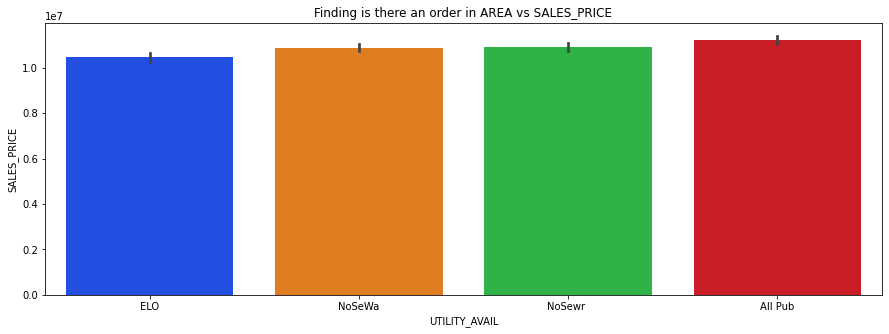

In [18]:
plt.figure(figsize=(15,5))
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=data,order=data.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.title('Finding is there an order in AREA vs SALES_PRICE')
plt.show()





*   House with all public facilty has high sales price. 


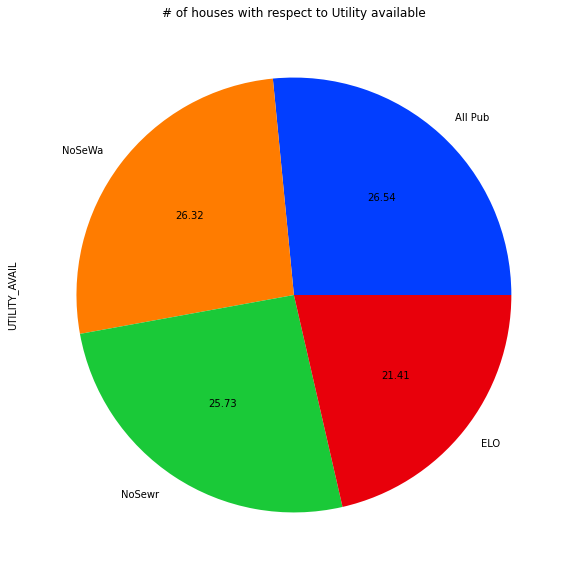

In [19]:
plt.figure(figsize=(15,10))
data.UTILITY_AVAIL.value_counts().plot(kind='pie', autopct="%.2f")
plt.title("# of houses with respect to Utility available")
plt.show()


*   So more people willing to buy house with all public facility available.



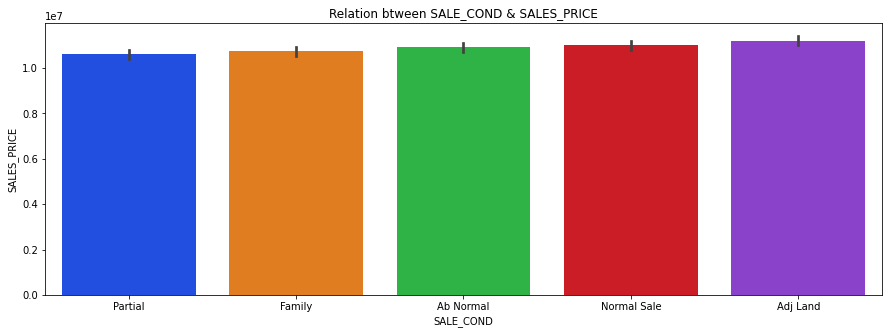

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=data,order=data.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND'])
plt.title("Relation btween SALE_COND & SALES_PRICE")
plt.show()

Here every features are in linear trend so we can use Lable Encode.

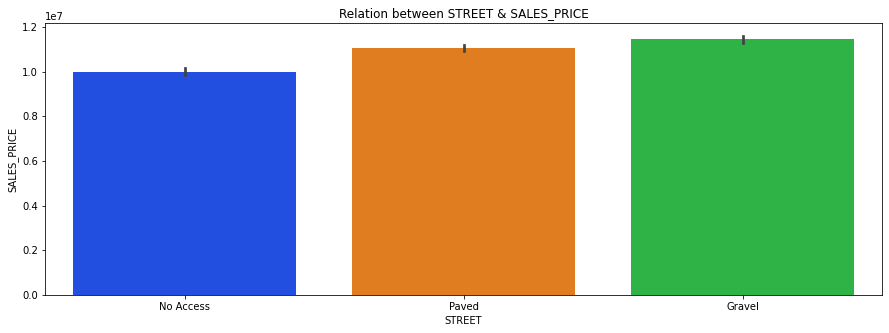

In [21]:
plt.figure(figsize=(15,5))
sns.barplot(x='STREET',y='SALES_PRICE',data=data,order=data.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.title("Relation between STREET & SALES_PRICE")
plt.show()

Here there is no linear relation between the values so we can go with Label Encode.

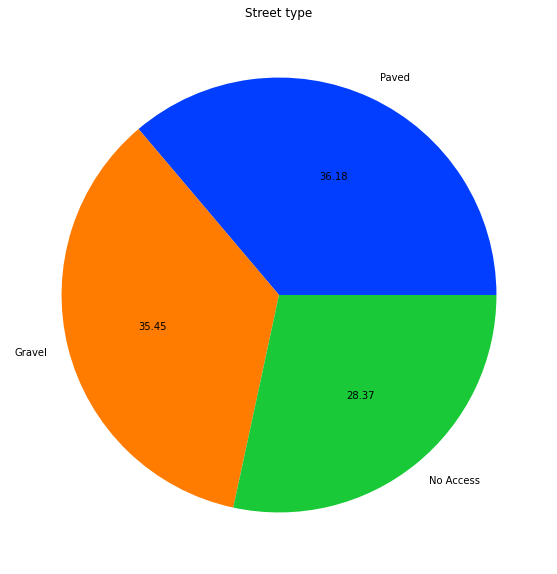

In [22]:
data.STREET.value_counts().plot(kind='pie', autopct="%.2f", figsize=(15,10))
plt.title("Street type")
plt.ylabel('')
plt.show()



*   Most number of house located on Paved streets.
*   more than 35% houses located on Gravel street.



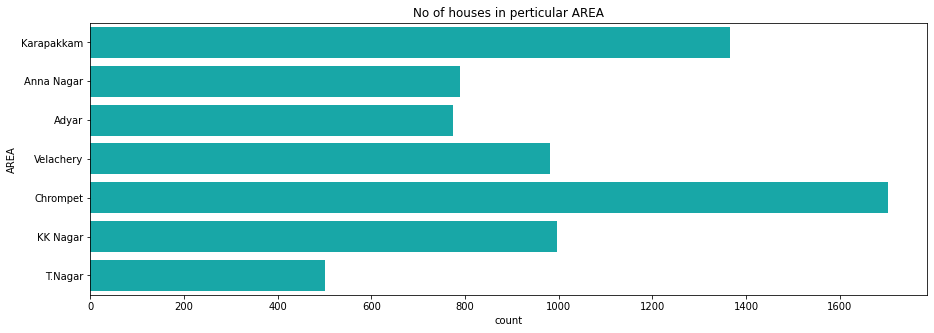

In [23]:
plt.figure(figsize=(15,5))
sns.countplot(y="AREA", data=data, color="c")
plt.title("No of houses in perticular AREA")
plt.show()

This plot shows No.of Houses in Area,as shown on the fig,Chrompet contains maximum number of houses,T Nagar contains less number of house.

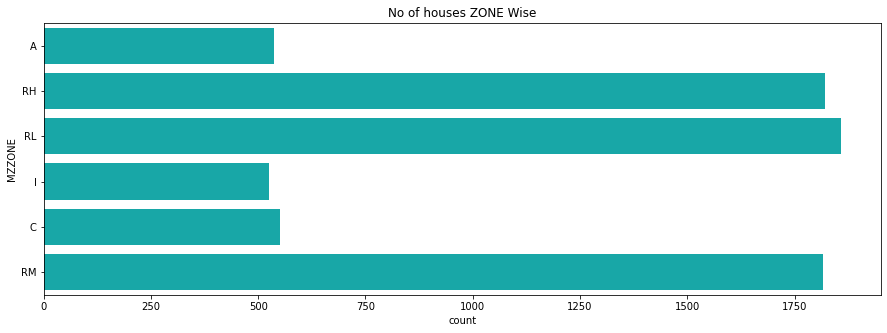

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(y="MZZONE", data=data, color="c")
plt.title("No of houses ZONE Wise")
plt.show()

Here,


*   A  => Agricultural Land 
*   RH => Residential High-Density Land

*   RL => Residential Low Density Land
*   I  => Industrial Land

*   C  => Commertial Land
*   RM => Residential Medium-Density Land













In [25]:
A=data['AREA'].groupby(data['AREA']).count()
B=data['AREA'].groupby(data['BUILDTYPE']).count()
C=data['AREA'].groupby(data['UTILITY_AVAIL']).count()
D=data['AREA'].groupby(data['STREET']).count()
E=data['AREA'].groupby(data['MZZONE']).count()
F=data['AREA'].groupby(data['PARK_FACIL']).count()

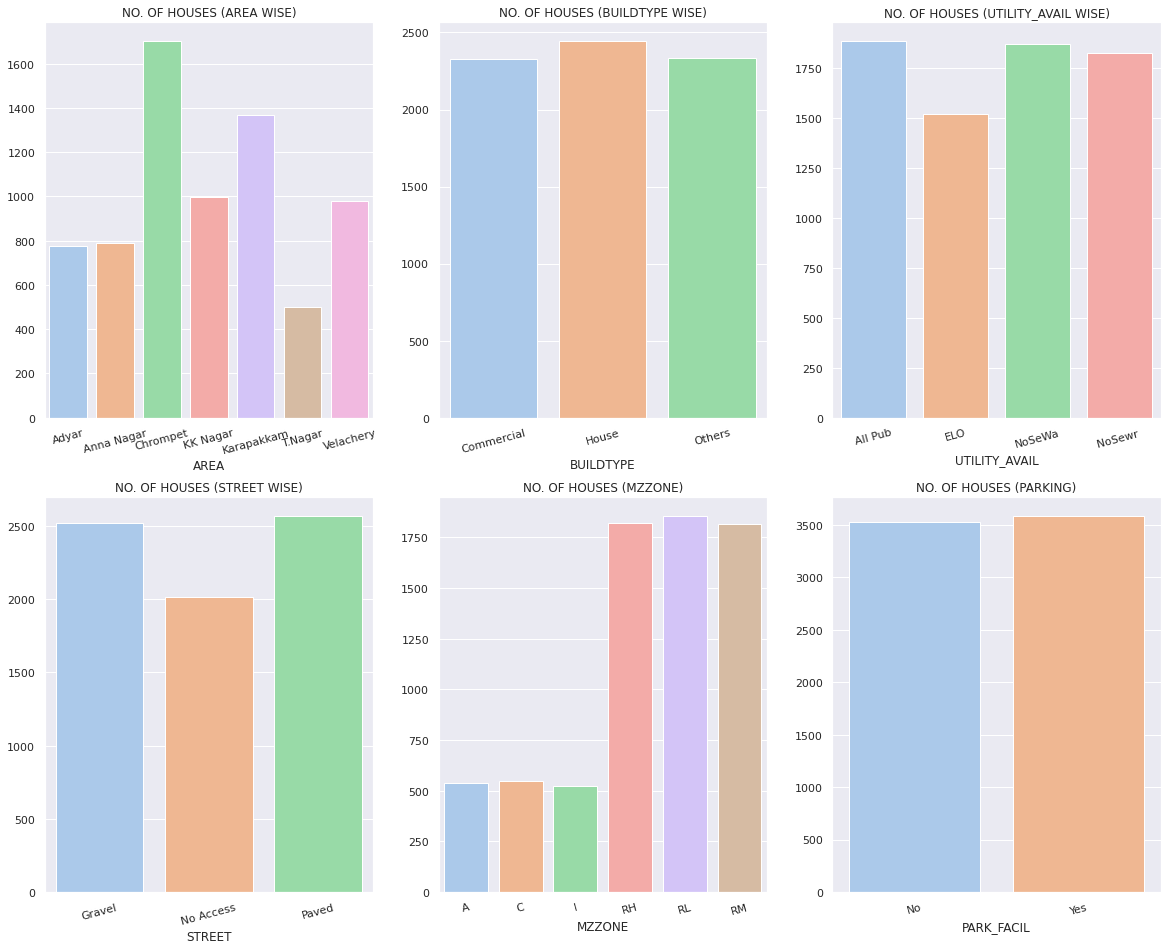

In [26]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(20,16))
plt.subplot(231)
sns.barplot(x=A.index,y=A.values,data=data)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (AREA WISE)')
plt.subplot(232)
sns.barplot(x=B.index,y=B.values,data=data)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (BUILDTYPE WISE)')
plt.subplot(233)
sns.barplot(x=C.index,y=C.values,data=data)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (UTILITY_AVAIL WISE)')
plt.subplot(234)
sns.barplot(x=D.index,y=D.values,data=data)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (STREET WISE)')
plt.subplot(235)
sns.barplot(x=E.index,y=E.values,data=data)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (MZZONE)')
plt.subplot(236)
sns.barplot(x=F.index,y=F.values,data=data)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (PARKING)')

plt.show()

Each plot shows the No.of.Houses Based on the each features.

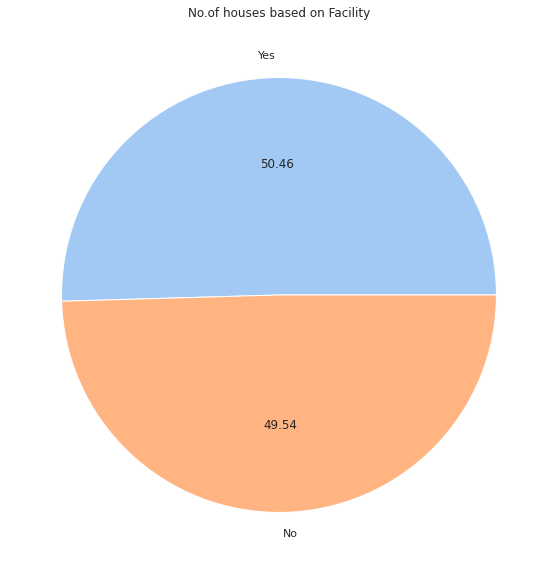

In [27]:
data.PARK_FACIL.value_counts().plot(kind='pie', autopct="%.2f", figsize=(15,10))
plt.title("No.of houses based on Facility")
plt.ylabel('')
plt.show()



*   This plot shows 50% of the houses have parking facility



In [28]:
mean=pd.DataFrame(data[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].mean())
median=pd.DataFrame(data[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].median())
max=pd.DataFrame(data[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].max())
min=pd.DataFrame(data[['AREA', 'BUILDTYPE','SALES_PRICE']].groupby(['BUILDTYPE','AREA'])['SALES_PRICE'].min())
df = pd.concat([min,mean['SALES_PRICE'].rename('Average'),median['SALES_PRICE'].rename('Median'),max['SALES_PRICE'].rename('Maximum')],axis=1)
column =['Minimum','Average','Median','Maximum']
df = pd.DataFrame(df)
df.rename(columns={'SALES_PRICE':'Minimum'},inplace=True)
df['BUILDTYPE']=['Commercial','Commercial','Commercial','Commercial','Commercial','Commercial','Commercial',
                      'House','House','House','House','House','House','House',
                      'Others','Others','Others','Others','Others','Others','Others']
df['AREA']=["Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T.Nagar","Velachery",
                 "Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T.Nagar","Velachery",
                 "Adyar","Anna Nagar","Chrompet","KK Nagar","Karapakam","T.Nagar","Velachery"]

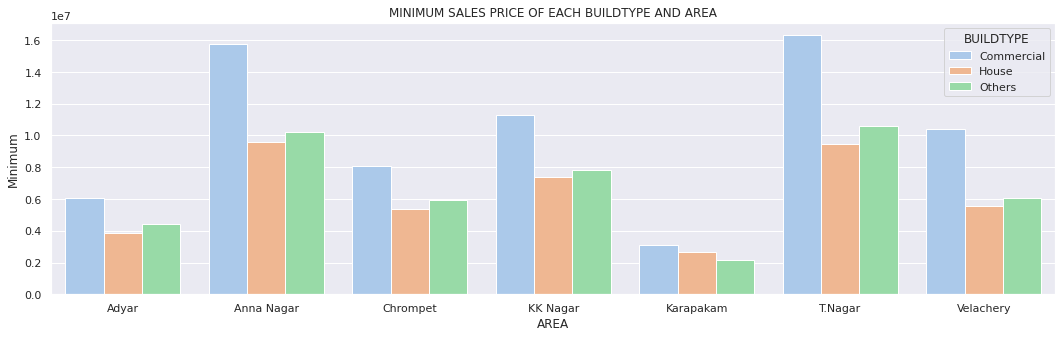

In [29]:
plt.figure(figsize=(18,5))
sns.barplot(x='AREA',y='Minimum',data=df,hue='BUILDTYPE')
plt.title('MINIMUM SALES PRICE OF EACH BUILDTYPE AND AREA')
plt.show()



*   **COMMERCIAL** - Karapakkam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"]. "T Nagar" is the first highest according to the "Sales_Price".


*   **HOUSE** - Again Karapakam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"]. Again "T Nagar" is the first highest according to the "Sales_Price".

*   **OTHERS** -Again Karapakam area has the lowest price when compared with other area's. Followed with ["Adyar","Chrompet","Velachery","KK Nagar","Anna Nagar","T Nagar"]. Again "T Nagar" is the first highest according to the "Sales_Price".





###Encoding

In [30]:
#Encoding Using map
data["AREA"]=data["AREA"].map({"Karapakkam":1,"Adyar":2,"Chrompet":3,"Velachery":4,"KK Nagar":5,"Anna Nagar":6,"T.Nagar":7})
data["UTILITY_AVAIL"]=data["UTILITY_AVAIL"].map({"ELO":1,"NoSeWa":2,"NoSewr ":3,"All Pub":4})
data["SALE_COND"]=data["SALE_COND"].map({"Partial":1,"Family":2,"Ab Normal":3,"Normal Sale":4,"Adj Land":5})
data["STREET"]=data["STREET"].map({"No Access":1,"Paved":2,"Gravel":3})

#Label Encoding
le = LabelEncoder()
data["MZZONE"]=le.fit_transform(data["MZZONE"])
data["BUILDTYPE"]=le.fit_transform(data["BUILDTYPE"])
data["PARK_FACIL"]=le.fit_transform(data["PARK_FACIL"])
#drop unwanted column
data.drop('SALE_YEAR',axis='columns', inplace=True)
data.drop('BUILD_YEAR',axis='columns', inplace=True)

###Modeling


In [31]:
x =data.drop(["SALES_PRICE"],axis=1)
y =data["SALES_PRICE"]

In [32]:
#Fit x,y values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)
print(x_train.shape)
print(x_test.shape)

(5687, 17)
(1422, 17)


**MODEL 1: LINEAR REGRESSION**



In [33]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
y_pred=lr.predict(x_test)

In [35]:
score = r2_score(y_test,y_pred)

In [36]:
MSE =mean_squared_error(y_test,y_pred)

In [37]:
print("R2_SCORE:",score)
print("MEAN_SQUARED_ERROR:",MSE)

R2_SCORE: 0.8110368370227802
MEAN_SQUARED_ERROR: 2657463184925.856


In [38]:
lr_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred.flatten()
})

lr_prediction.head(10)

,actual,predicted
131,13122040,1.228862e+07
1796,13729040,1.247494e+07
4285,8469580,7.608285e+06
3027,8350550,9.517711e+06
6410,13926830,1.150521e+07
2864,11351580,1.363292e+07
2381,11780070,9.770182e+06
4744,13138550,1.156099e+07
1930,6956820,6.379875e+06
2373,10514930,1.321290e+07


**MODEL 2:RANDOM FOREST**

In [39]:
rf =RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [40]:
y_pred=rf.predict(x_test)

In [41]:
score = r2_score(y_test,y_pred)
print("R2_SCORE:",score)

R2_SCORE: 0.9855077294136049


In [42]:
rf_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred.flatten()
})

rf_prediction.head(10)

,actual,predicted
131,13122040,12983831.40
1796,13729040,12920904.80
4285,8469580,8665078.55
3027,8350550,8594073.50
6410,13926830,13585873.00
2864,11351580,11578478.80
2381,11780070,12010527.75
4744,13138550,12822541.85
1930,6956820,7134195.60
2373,10514930,10529762.70


**MODEL3:XG BOOST**

In [43]:
xg_model= xg.XGBRegressor(colsample_bytree=0.4,
                 gamma=2,                 
                 learning_rate=0.01,
                 max_depth=4,
                 min_child_weight=1.5,
                 n_estimators=10000,)

In [44]:
xg_model.fit(x_train,y_train)

[12:03:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.4, gamma=2, learning_rate=0.01, max_depth=4,
             min_child_weight=1.5, n_estimators=10000)

In [45]:
xg_y_pred=xg_model.predict(x_test)

In [46]:
print("XG BOOST_R2 SCORE:",r2_score(y_test,xg_y_pred))

XG BOOST_R2 SCORE: 0.9992937920588169


In [47]:
xg_model_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted':xg_y_pred.flatten()
})

xg_model_prediction.head(10)

,actual,predicted
131,13122040,13117262.0
1796,13729040,13771838.0
4285,8469580,8443068.0
3027,8350550,8353140.0
6410,13926830,13483692.0
2864,11351580,11406302.0
2381,11780070,11490384.0
4744,13138550,13093736.0
1930,6956820,6933696.5
2373,10514930,10519282.0


**MODEL4:DECISION TREE REGRESSOR**

In [48]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [49]:
y_pred=dt.predict(x_test)

In [50]:
score = r2_score(y_test,y_pred)
print("R2_SCORE:",score)

R2_SCORE: 0.9648788242361783


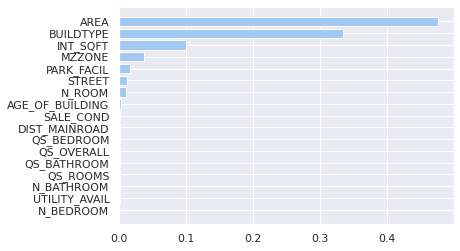

In [51]:

imp_feat = dt.feature_importances_
indices = np.argsort(imp_feat)

fig, ax = plt.subplots()
ax.barh(range(len(imp_feat)), imp_feat[indices])
ax.set_yticks(range(len(imp_feat)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

Based on DecisionTree Regressor plot.Important features are,

1.   AREA
2.   BUILDTYPE

1.   INT SQFT







In [52]:
dt_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred.flatten()
})

dt_prediction.head(10)

,actual,predicted
131,13122040,12964760.0
1796,13729040,13039760.0
4285,8469580,8259010.0
3027,8350550,8367250.0
6410,13926830,14046320.0
2864,11351580,12532900.0
2381,11780070,12274350.0
4744,13138550,12564350.0
1930,6956820,7178250.0
2373,10514930,10829040.0


**R_SQUARED_SCORE**

*   Linear Regression-----------> 0.8107316999206382

*   Random Forest---------------> 0.9850803126208474
*   XG Boost-------------------------> 0.9990864024487849

*   Decision Tree Regressor-> 0.9657313921042517

**From the R2 Score my XG BOOST model has the high accuracy near to 1.**







###Conclusion



*   From this data set houses were build between 1950 to 2010.


*   Houses were sold between 2004 to 2014.
*   Maximum number of house were sold on 2010 followed on 2011,2009.

*   T.Nagar has most expensive sales price.so it has less number of houses.(400+ houses)
*   Karapakkam has less expensive sales price.so it has maximun number of houses.(1300+ houses)


*   Chrompet area has maximum number of houses.(1600+ Houses)


*   Around 36% of peoples are willing to buy 4 room houses(2BHK).
*   Commertial type houses has much sales price.

*   Sale price of the all facility packed house rate are too high so pepople compensate to No Sewage system houses.Becase of the better price point.
 
*   Based on the sales condition all conditions has same range of sales price.

*   The price range of the Gravel street house is higher than Paved and No Access street.
*   More than 36% of houses located on paved street only.

*   Residential Low-Density Zone has maximum number of houses.(Nearly 1800 houses)
*   Price wise Anna Nagar and T.Nagar is much expensive.

*   50% of house has parking facility.

















**Things sellers need to focus.**



1.   36% of people intrested on 2BHK Houses.So 2BHK houses will sale more.

2.   Build house on Residential Low-Density zone will incresase the sale.

1.   Chrompet has 1600+ houses but the sale_price is not too much.So building house like this area will increase the sale and buyers also will to buy becaues of the sales price range is medium.
2.   Sellers should focused more on Chrompet and Karapakkam Areas.Because these areas has low sale_price range.

1.   AREA,BUILDTYPE and INT SQFT are play important role to buy a house.
2.   Houses which contains all public facilities is little expensive.












